Full Image Transformations

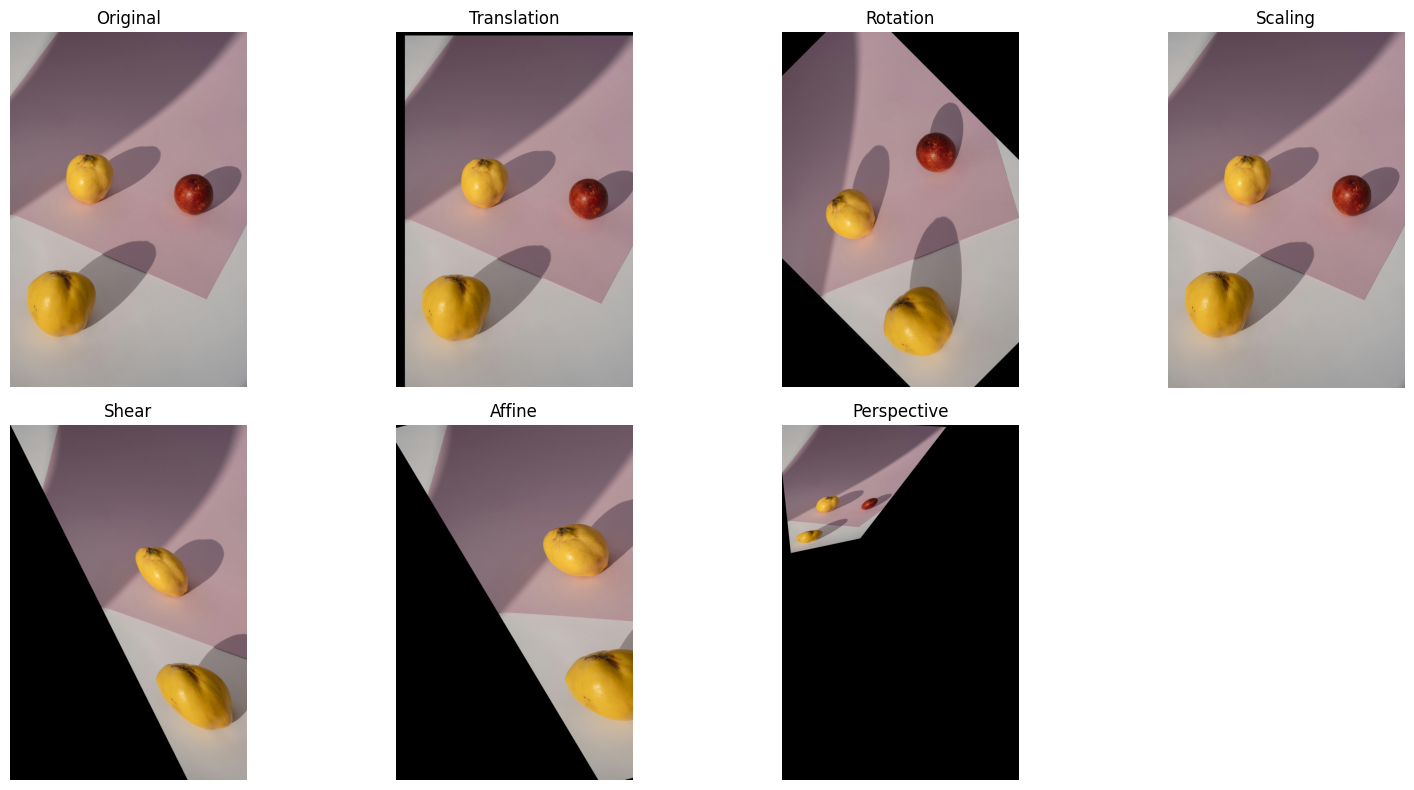

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- LOAD IMAGE ----------
img = cv2.imread("images.jpg")
if img is None:
    raise FileNotFoundError("Image not found.")

rows, cols, ch = img.shape

# ---------- 1. TRANSLATION ----------
M_trans = np.float32([[1, 0, 100], [0, 1, 50]])
dst_trans = cv2.warpAffine(img, M_trans, (cols, rows))

# ---------- 2. ROTATION ----------
center = (cols // 2, rows // 2)
M_rot = cv2.getRotationMatrix2D(center, 45, 1.0)
dst_rot = cv2.warpAffine(img, M_rot, (cols, rows))

# ---------- 3. SCALING ----------
dst_scale = cv2.resize(img, None, fx=1.5, fy=1.5)

# ---------- 4. SHEARING ----------
M_shear = np.float32([[1, 0.5, 0],
                      [0, 1, 0]])
dst_shear = cv2.warpAffine(img, M_shear, (cols, rows))

# ---------- 5. AFFINE ----------
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
dst_affine = cv2.warpAffine(img, M_affine, (cols, rows))

# ---------- 6. PERSPECTIVE ----------
pts3 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts4 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M_persp = cv2.getPerspectiveTransform(pts3, pts4)
dst_persp = cv2.warpPerspective(img, M_persp, (cols, rows))

# ---------- DISPLAY ----------
titles = ['Original', 'Translation', 'Rotation',
          'Scaling', 'Shear', 'Affine', 'Perspective']

images = [
    img,
    dst_trans,
    dst_rot,
    dst_scale,
    dst_shear,
    dst_affine,
    dst_persp
]

plt.figure(figsize=(16, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


ROI-Based Transformations (Object-Level)

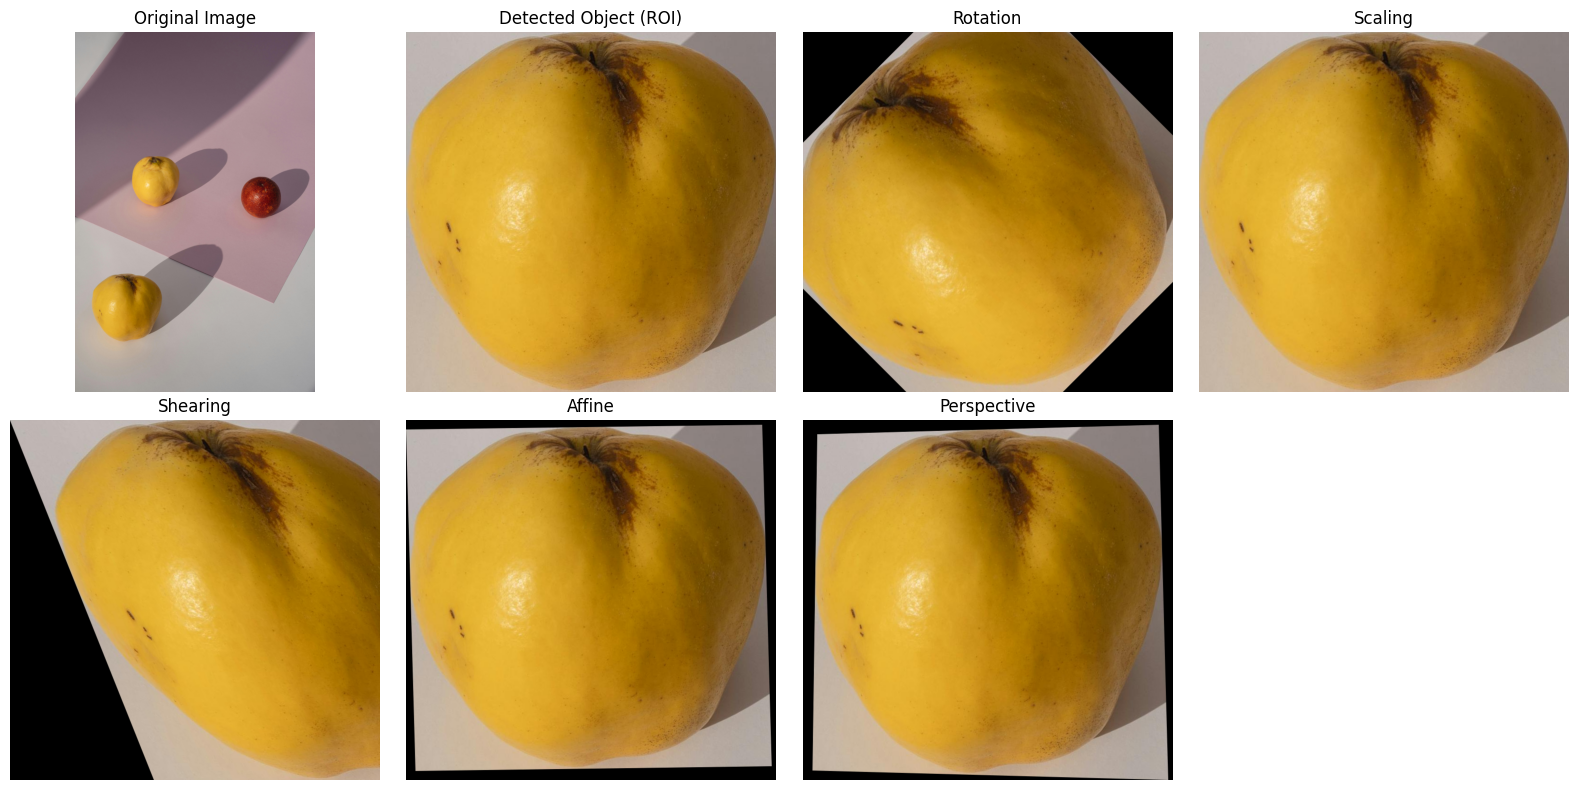

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- LOAD IMAGE ----------
img = cv2.imread("images.jpg")
if img is None:
    raise FileNotFoundError("Image not found.")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------- OBJECT DETECTION (COLOR-BASED) ----------
# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Yellow color range (tuned for this image)
lower_yellow = np.array([15, 80, 80])
upper_yellow = np.array([40, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Clean mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# ---------- FIND OBJECT ----------
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    raise ValueError("No object detected.")

# Take the largest contour (main object)
c = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)

roi = img[y:y+h, x:x+w]
roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

# ---------- TRANSFORMATIONS ----------
h_roi, w_roi = roi.shape[:2]

# 1. Rotation
center = (w_roi // 2, h_roi // 2)
M_rot = cv2.getRotationMatrix2D(center, 45, 1)
rotated = cv2.warpAffine(roi, M_rot, (w_roi, h_roi))

# 2. Scaling
scaled = cv2.resize(roi, None, fx=1.5, fy=1.5)

# 3. Shearing
M_shear = np.float32([[1, 0.4, 0],
                      [0, 1, 0]])
sheared = cv2.warpAffine(roi, M_shear, (w_roi, h_roi))

# 4. Affine
pts1 = np.float32([[0, 0], [w_roi - 1, 0], [0, h_roi - 1]])
pts2 = np.float32([[0, 20], [w_roi - 30, 10], [20, h_roi - 20]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(roi, M_affine, (w_roi, h_roi))

# 5. Perspective
pts3 = np.float32([[0, 0], [w_roi, 0], [0, h_roi], [w_roi, h_roi]])
pts4 = np.float32([[30, 30], [w_roi - 30, 10], [20, h_roi - 20], [w_roi - 10, h_roi]])
M_persp = cv2.getPerspectiveTransform(pts3, pts4)
perspective = cv2.warpPerspective(roi, M_persp, (w_roi, h_roi))

# ---------- DISPLAY ----------
titles = [
    "Original Image",
    "Detected Object (ROI)",
    "Rotation",
    "Scaling",
    "Shearing",
    "Affine",
    "Perspective"
]

images = [
    img_rgb,
    roi_rgb,
    cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB),
    cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB),
    cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB),
    cv2.cvtColor(affine, cv2.COLOR_BGR2RGB),
    cv2.cvtColor(perspective, cv2.COLOR_BGR2RGB)
]

plt.figure(figsize=(16, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
